In [1]:
import pandas as pd
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import torch
from torch.utils.data import Dataset, DataLoader

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/anecdoted/anecdotes_dataset.csv")

In [3]:
df.tail()

,joke,word_count,char_count
44103,В цирке конферансье объявляет номер: — Мальчик...,63,359
44104,В салоне шикарного корабля бал Вдруг с мрачным...,32,184
44105,"Под утро, за игрой в покер, умер старый еврей ...",82,392
44106,Едут два хохла в купе Один другому говорит:- П...,82,389
44107,"Лучшее за все время Как Анекдоты категории Б, ...",18,110


In [4]:

df = df.drop_duplicates()
print("Кол-во примеров:", len(df))

Кол-во примеров: 44108


In [5]:
df = df[df['joke'].apply(lambda x: len(x.split(' ')) < 100)]

print("Кол-во примеров если выкинуть слишком длинные тексты:", len(df))

Кол-во примеров если выкинуть слишком длинные тексты: 44108


In [6]:

df = df[df['joke'].apply(lambda x: len(x.split(' ')) > 10)]
print("Кол-во примеров если выкинуть слишком короткие тексты:", len(df))

Кол-во примеров если выкинуть слишком короткие тексты: 44108


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


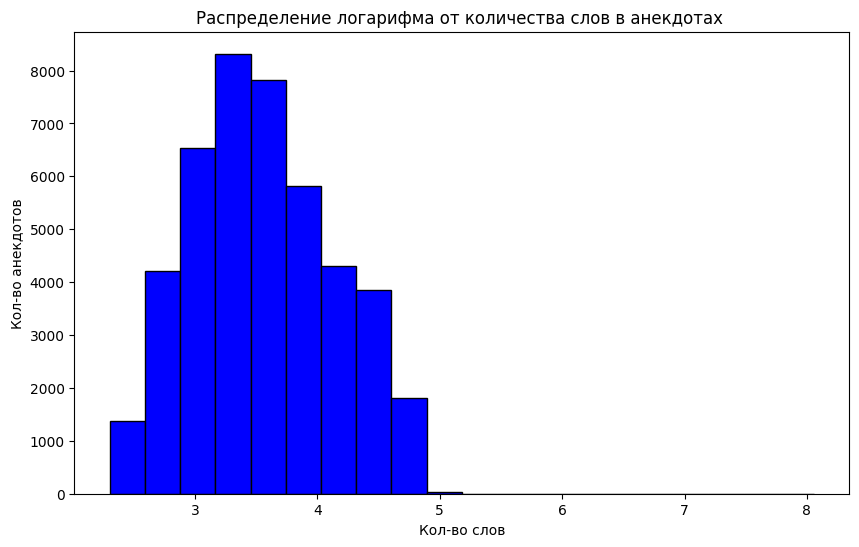

Среднее кол-во слов: 41.62766391584293
Среднее кол-во символов: 202.08202593633808
Частые слова: [('это', 9203), ('говорит', 8173), ('мужик', 5047), ('спрашивает', 4284), ('почему', 3296), ('жена', 2668), ('тебе', 2348), ('приходит', 2297), ('муж', 2036), ('день', 1864), ('доктор', 1777), ('отвечает', 1750), ('подходит', 1686), ('заходит', 1571), ('очень', 1460), ('домой', 1409), ('время', 1399), ('папа', 1390), ('девушка', 1378), ('мама', 1377), ('сегодня', 1356), ('сказал', 1347), ('сидит', 1327), ('видит', 1280), ('идет', 1276), ('просто', 1240), ('давай', 1230), ('стоит', 1226), ('лет', 1207), ('две', 1187), ('сколько', 1143), ('человек', 1140), ('всё', 1106), ('хочу', 1098), ('вчера', 1087), ('такое', 1055), ('смотрит', 1053), ('сын', 1049), ('второй', 1046), ('могу', 1007), ('отец', 980), ('знаю', 978), ('русский', 975), ('ещё', 972), ('женщина', 916), ('мужчина', 915), ('мальчик', 912), ('пожалуйста', 910), ('дверь', 903), ('выходит', 902)]


In [7]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))

df['word_count'] = df['joke'].apply(lambda x: len(word_tokenize(x)))
df['char_count'] = df['joke'].apply(len)

all_words = ' '.join(df['joke']).lower()
tokens = word_tokenize(all_words)
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
frequency = Counter(tokens)

plt.figure(figsize=(10, 6))
plt.hist(np.log(df['word_count']), bins=20, color='blue', edgecolor='black')
plt.title('Распределение логарифма от количества слов в анекдотах ')
plt.xlabel('Кол-во слов')
plt.ylabel('Кол-во анекдотов')
plt.show()

print("Среднее кол-во слов:", df['word_count'].mean())
print("Среднее кол-во символов:", df['char_count'].mean())
print("Частые слова:", frequency.most_common(50))

In [8]:
df.to_csv("anecdotes_dataset.csv", index=False)

In [9]:
df = pd.read_csv("anecdotes_dataset.csv")
df

,joke,word_count,char_count
0,Нижегородский купчина рассказывает своим друзь...,69,358
1,"- Папа, а марсиане есть?- Нет, сынок, кончилис...",21,78
2,- Где работает ваш муж?- Уже третий месяц на л...,28,126
3,"- Дорогой, я похожа на идеальную женщину ?- Не...",29,111
4,"- О, милая! Панировка этих котлет такая хрустя...",30,144
...,...,...,...
44103,В цирке конферансье объявляет номер: — Мальчик...,63,359
44104,В салоне шикарного корабля бал Вдруг с мрачным...,32,184
44105,"Под утро, за игрой в покер, умер старый еврей ...",82,392
44106,Едут два хохла в купе Один другому говорит:- П...,82,389


In [10]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained('ai-forever/rugpt3small_based_on_gpt2')

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

In [11]:

model = AutoModelWithLMHead.from_pretrained('ai-forever/rugpt3small_based_on_gpt2')

/opt/conda/lib/python3.10/site-packages/transformers/models/auto/modeling_auto.py:1564: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

In [12]:
# import os
# output_dir = "/kaggle/working"
# torch.save(model.state_dict(),os.path.join(output_dir, f"val_loss-{1}.pt"),)

In [13]:
tokenizer.special_tokens_map

{'bos_token': '<s>',
 'eos_token': '</s>',
 'unk_token': '<unk>',
 'pad_token': '<pad>',
 'mask_token': '<mask>'}

In [14]:
print("Кол-во параметрров:", sum(p.numel() for p in model.parameters()))

Кол-во параметрров: 125231616


In [15]:
test_df = df.sample(n=100, random_state=42)
df = df.drop(test_df.index)
test_df = test_df.reset_index(drop=True)
df = df.reset_index(drop=True)

In [16]:
# def split_joke(joke):
#     words = joke.split()
#     split_index = len(words) * 80 // 100
#     return ' '.join(words[:split_index]), ' '.join(words[split_index:])
# 
# 
# test_df['joke'], test_df['punchline'] = zip(*test_df['joke'].apply(split_joke))


In [17]:
for name, module in model.named_children():
    print(f"{name}: {module}")


transformer: GPT2Model(
  (wte): Embedding(50264, 768)
  (wpe): Embedding(2048, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)
lm_head: Linear(in_features=768, out_features=50264, bias=False)


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
class AnecdoteDataset(Dataset):
    def __init__(self, tokenizer, data_source, max_length=2007):
        self.tokenizer = tokenizer
        self.df = data_source
        self.max_length = max_length
        self.anecdotes = []

        for anecdote in self.df['joke']:
            tokenized = self.tokenizer(anecdote, max_length=self.max_length, truncation=True, return_tensors='pt')
            self.anecdotes.append(tokenized)

    def __len__(self):
        return len(self.anecdotes)

    def __getitem__(self, idx):
        return self.anecdotes[idx]



dataset = AnecdoteDataset(tokenizer=tokenizer, data_source=df)

val_dataset = AnecdoteDataset(tokenizer=tokenizer, data_source=test_df)

In [20]:
import torch.nn.functional as F
from nltk.translate.bleu_score import corpus_bleu
import torch


def calculate_bleu(model, dataset, device, tokenizer, max_length=200, num_examples=10, verbal=False):
    model.to(device)
    model.eval()
    references = []
    hypotheses = []

    with torch.no_grad():
        for i, item in enumerate(dataset):

            input_ids = item['input_ids'].squeeze(0).to(device)
            split_idx = int(input_ids.size(0) * 0.6)
            context_ids = input_ids[:split_idx].unsqueeze(0)

            reference_ids = input_ids[split_idx:].unsqueeze(0)
            reference = tokenizer.decode(reference_ids[0], skip_special_tokens=True)
            references.append([reference.split()])

            outputs = model.generate(
                input_ids=context_ids,
                attention_mask=torch.ones(context_ids.shape).to(device),
                max_length=split_idx + max_length,
                repetition_penalty=1.2,
                length_penalty=1.0,
                temperature=1.2,
                do_sample=True,
                eos_token_id=tokenizer.eos_token_id,
            )

            hypothesis = tokenizer.decode(outputs[0], skip_special_tokens=True)
            hypotheses.append(hypothesis.split())

            if verbal and i < num_examples:
                print(f"Пример {i + 1}:")
                print(f"Сгенерировано: {hypothesis}")
                print(f"Эталон: {reference}\n")

    bleu_score = corpus_bleu(references, hypotheses)
    return bleu_score


bleu_score = calculate_bleu(model, val_dataset, device, tokenizer, verbal=True)
bleu_score

Пример 1:
Сгенерировано: встретились как-то агент кремля и агент цэвэр. И они, конечно же влюбились друг в друга с первого раза, так что после одного неловкого движения их разморило — не сразу и надолго...
Упаковка для косметики была большой и толстой: от баночной коробки до пластиковой одноразовой "тётеньки" на коробке под цвет и размер упаковки, а также из плотной бумаги и прозрачного материала для придания глянцу цвета, придающего упаковке солидный вид и красивый внешний вид. Коробочка внутри уже была довольно просторна за счёт того, что объёмной и плотно завязаной (что позволяет удобно использовать её вместо переноски/склепывания содержимого) у неё был предусмотрен карман по размеру сумки или кошелька, чтобы легче было переносить содержимое, без сложений и разглаживания). 
  Натуральное дерево (даже самые лучшие отделочные материалы и полиуретановые эмали создают иллюзию мягкости кожи): я купила специальную салфетку, обернутую пленкой для глаз с натуральным древес
Эталон: ру а там 

0.0025653641077214256

In [21]:
def calculate_perplexity(model, dataset, device):
    model.to(device)
    model.eval()
    total_loss = 0
    total_tokens = 0

    with torch.no_grad():
        for item in dataset:
            inputs = {k: v.to(device) for k, v in item.items()}
            outputs = model(**inputs, labels=inputs['input_ids'])

            loss = F.cross_entropy(outputs.logits.view(-1, model.config.vocab_size),
                                   inputs['input_ids'].view(-1), reduction='sum')
            total_loss += loss.item()
            total_tokens += inputs['input_ids'].numel()

    avg_loss = total_loss / total_tokens
    return torch.exp(torch.tensor(avg_loss)).item()


# Вызовите функцию так:
perplexity = calculate_perplexity(model, val_dataset, device)
perplexity

61636.51953125

In [22]:
def pack_tensor(new_tensor, packed_tensor, max_seq_len):
    if packed_tensor is None:
        return new_tensor, True, None
    if new_tensor.size()[1] + packed_tensor.size()[1] > max_seq_len:
        return packed_tensor, False, new_tensor
    else:
        packed_tensor = torch.cat([new_tensor[:, :-1], packed_tensor], dim=1)
        return packed_tensor, True, None

In [23]:
import os
from tqdm import tqdm
from transformers import get_linear_schedule_with_warmup, AdamW

from torch.utils.data import DataLoader


def calculate_validation_loss(model, val_dataloader, device):
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for idx, entry in enumerate(val_dataloader):
            input_ids = entry['input_ids'].squeeze(0).to(device)
            outputs = model(input_ids, labels=input_ids)
            loss = outputs[0]
            total_val_loss += loss.item()
    return total_val_loss / len(val_dataloader)


def train(
        dataset, val_dataset, model, tokenizer, device,
        batch_size=16, epochs=3, lr=2e-4,
        max_seq_len=400, warmup_steps=200,
        output_dir="/kaggle/working"):
    model = model.to(device)
    model.train()

    optimizer = AdamW(model.parameters(), lr=lr)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=warmup_steps, num_training_steps=-1
    )

    train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=True)
    best_val_loss = float('inf')

    accumulating_batch_count = 0
    input_tensor = None

    best_perplexity = float('inf')
    best_bleu = 0
    losses = []
    val_losses = []
    avg_train_losses = []
    for epoch in range(epochs):
        model.train()

        print(f"Training epoch {epoch}")

        train_loss = 0
        progress_bar = tqdm(enumerate(train_dataloader), total=len(train_dataloader))

        for idx, entry in progress_bar:
            input_ids = entry['input_ids'].squeeze(0)  # Убираем лишнюю размерность
            (input_tensor, carry_on, remainder) = pack_tensor(input_ids, input_tensor, max_seq_len)

            if carry_on and idx != len(train_dataloader) - 1:
                continue

            input_tensor = input_tensor.to(device)
            outputs = model(input_tensor, labels=input_tensor)
            loss = outputs[0]
            train_loss += loss.item()

            tqdm_desc = f"Epoch {epoch} - Train Loss: {train_loss / (idx + 1):.4f}"
            progress_bar.set_description(tqdm_desc)
            if idx % 100 == 0:
                losses.append(loss.item())


            loss.backward()

            if (accumulating_batch_count % batch_size) == 0:
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                model.zero_grad()

            accumulating_batch_count += 1
            input_tensor = None

        avg_train_loss = train_loss / len(train_dataloader)
        avg_train_losses.append(avg_train_loss)
        print(f"Average Training Loss: {avg_train_loss}")

        avg_val_loss = calculate_validation_loss(model, val_dataloader, device)
        val_losses.append(avg_val_loss)
        print(f"Validation Loss: {avg_val_loss}")

        perplexity = calculate_perplexity(model=model, dataset=val_dataset, device=device)
        print(f"Validation Perplexity: {perplexity}")

        bleu = calculate_bleu(model=model, dataset=val_dataset, device=device, tokenizer=tokenizer)
        print(f"Validation BLEU: {bleu}")
        best_perplexity = min(perplexity, best_perplexity)
        best_bleu = max(bleu, best_bleu)
        print(f"Best BLEU: {best_bleu}; Best perplexity: {best_perplexity}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(
                model.state_dict(),
                os.path.join(output_dir, f"val_loss-{epoch}.pt"),
            )
            print(f"Model saved!!!")

    return model, best_bleu, best_perplexity, losses, avg_train_losses, val_losses


finetuned_model, bleu, ppx, losses, avg_train_losses, val_losses = train(dataset=dataset, val_dataset=val_dataset,
                                                       tokenizer=tokenizer, model=model,
                                                       device=device)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training epoch 0


Epoch 0 - Train Loss: 0.4551: 100%|██████████| 44008/44008 [06:08<00:00, 119.32it/s]


Average Training Loss: 0.4550692779278673
Validation Loss: 3.641466128826141
Validation Perplexity: 60925.34765625
Validation BLEU: 0.0025722347159895555
Best BLEU: 0.0025722347159895555; Best perplexity: 60925.34765625
Model saved!!!
Training epoch 1


Epoch 1 - Train Loss: 0.4327: 100%|██████████| 44008/44008 [06:08<00:00, 119.48it/s]


Average Training Loss: 0.43272654117481035
Validation Loss: 3.641466128826141
Validation Perplexity: 60925.34765625
Validation BLEU: 0.002456192117550588
Best BLEU: 0.0025722347159895555; Best perplexity: 60925.34765625
Training epoch 2


Epoch 2 - Train Loss: 0.4334: 100%|██████████| 44008/44008 [06:08<00:00, 119.55it/s]


Average Training Loss: 0.4333554788465024
Validation Loss: 3.641466128826141
Validation Perplexity: 60925.34765625
Validation BLEU: 0.0025494024935086555
Best BLEU: 0.0025722347159895555; Best perplexity: 60925.34765625


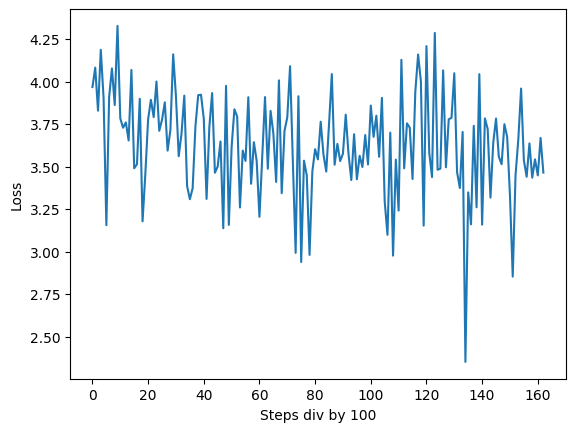

In [24]:
import matplotlib.pyplot as plt

plt.plot(losses, label='Training Loss')
plt.xlabel("Steps div by 100")
plt.ylabel("Loss")
plt.show()

In [26]:
calculate_bleu(model=finetuned_model, tokenizer=tokenizer, verbal=True, dataset=val_dataset, device=device)

Пример 1:
Сгенерировано: встретились как-то агент кремля и агент цмс Один другому говорит:- У меня в газете на стене стоит зеркало - Неужели?! Врешь, не поверишь— Пап, а тебе правда хочется сказать:"Я твоя жена,"— Я так больше ничего за нее ни скажуШтирлиц шел с отцом по пыльной дороге — По улице идет солдат Острогожского полка Штирлиц остановился: там дети играли, отец повернулся к нему. Через несколько минут он снова встает. Дети сидят возле него Тут к отряху входит поручик Ржевский Грабитель: - Ваше благородие! Мы хотим жить!- Как вы сказали? С какого стати?- Нижайше прошу вас отдать моего сына на съедение диким бизам...Через 3 ч после свадьбы все резко расходятся Муж возвращается из командировки и приносит с сыном записку от матери Жена ему отвечает: "Докажите обратное - я знаю точно..." Сын приходит домой, но быстро переодевается Мама тоже думает над этим его словами Вдруг сын подбегает к отцу и что ты о себе думаешь
Эталон: ру а там 40 трупов сел медведь и сгорел

Пример 2:
Сгене

0.0027128151365883473